In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Processed/Processed4
df = pd.read_csv("pengaruhReputasi.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Processed/Processed4


,Reputation,pd_score
0,123,0.160205
1,2173,0.012474
2,93,0.071685
3,2020,0.003057
4,4184,0.029622


In [3]:
df.describe()

,Reputation,pd_score
count,5.348200e+05,534820.000000
mean,2.149911e+03,0.560958
std,9.330383e+03,1.081086
min,3.000000e+00,0.000000
25%,5.300000e+01,0.019785
50%,2.730000e+02,0.118064
75%,1.207000e+03,0.493036
max,1.054815e+06,16.666667


In [4]:
df.isnull().sum()

,0
Reputation,0
pd_score,0


In [5]:
df['Reputation'] = pd.to_numeric(df['Reputation'], errors='coerce')
df['pd_score'] = pd.to_numeric(df['pd_score'], errors='coerce')

In [6]:
df['Reputation_log'] = np.log1p(df['Reputation'])

In [7]:
scaler = StandardScaler()
df['Reputation_scaled'] = scaler.fit_transform(df[['Reputation']])
df['Reputation_log'] = np.log1p(df['Reputation'])
df['Reputation_log_scaled'] = scaler.fit_transform(df[['Reputation_log']])

In [8]:
X_original = df[['Reputation_scaled']]
X_log = df[['Reputation_log_scaled']]
y = df['pd_score']

In [9]:
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(
    X_log, y, test_size=0.2, random_state=42
)

In [10]:
model_log = LinearRegression()
model_log.fit(X_log_train, y_log_train)

LinearRegression()

In [11]:
y_pred_log_train = model_log.predict(X_log_train)
y_pred_log_test = model_log.predict(X_log_test)

In [12]:
slope_log = model_log.coef_[0]
intercept_log = model_log.intercept_
r2_log_train = metrics.r2_score(y_log_train, y_pred_log_train)
r2_log_test = metrics.r2_score(y_log_test, y_pred_log_test)
rmse_log_train = np.sqrt(metrics.mean_squared_error(y_log_train, y_pred_log_train))
rmse_log_test = np.sqrt(metrics.mean_squared_error(y_log_test, y_pred_log_test))

In [13]:
def perform_regression(X, y, title):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    slope = model.coef_[0]
    intercept = model.intercept_
    r2_train = metrics.r2_score(y_train, y_pred_train)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

    X_with_const = np.column_stack([np.ones(len(X)), X])
    beta_hat = np.array([intercept, slope])
    y_pred_full = X_with_const.dot(beta_hat)
    n = len(X)
    p = 2
    dof = n - p
    mse = np.sum((y - y_pred_full) ** 2) / dof
    var_beta_hat = mse * np.linalg.inv(X_with_const.T.dot(X_with_const))
    sd_beta_hat = np.sqrt(np.diag(var_beta_hat))
    t_stat = beta_hat / sd_beta_hat
    p_values = 2 * (1 - stats.t.cdf(abs(t_stat), dof))

    print(f"\nHasil Analisis Regresi Linear untuk {title}:")
    print("-" * 50)
    print(f"Slope/Koefisien: {slope}")
    print(f"Intercept: {intercept}")
    print(f"P-value slope: {p_values[1]}")
    print(f"P-value intercept: {p_values[0]}")
    print(f"R-squared (training): {r2_train}")
    print(f"R-squared (testing): {r2_test}")
    print(f"RMSE (training): {rmse_train}")
    print(f"RMSE (testing): {rmse_test}")

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X_train, y_train, color='blue', label='Data Training', alpha=0.5)
    plt.plot(X_train, y_pred_train, color='red', label='Garis Regresi')
    plt.title(f'Training Set - {title}')
    plt.xlabel('Reputasi')
    plt.ylabel('pd_score')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(X_test, y_test, color='green', label='Data Testing', alpha=0.5)
    plt.plot(X_train, y_pred_train, color='red', label='Garis Regresi')
    plt.title(f'Testing Set - {title}')
    plt.xlabel('Reputasi')
    plt.ylabel('pd_score')
    plt.legend()

    plt.tight_layout()
    plt.show()

    residuals = y_test - y_pred_test
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_test, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residual Plot - {title}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid(True, alpha=0.3)
    plt.show()


Hasil Analisis Regresi Linear untuk Original Scale:
--------------------------------------------------
Slope/Koefisien: -0.019990735619465894
Intercept: 0.561097799198591
P-value slope: 0.0
P-value intercept: 0.0
R-squared (training): 0.00034744416834986414
R-squared (testing): 0.0003501148763780382
RMSE (training): 1.0824108323001176
RMSE (testing): 1.0748179825494337


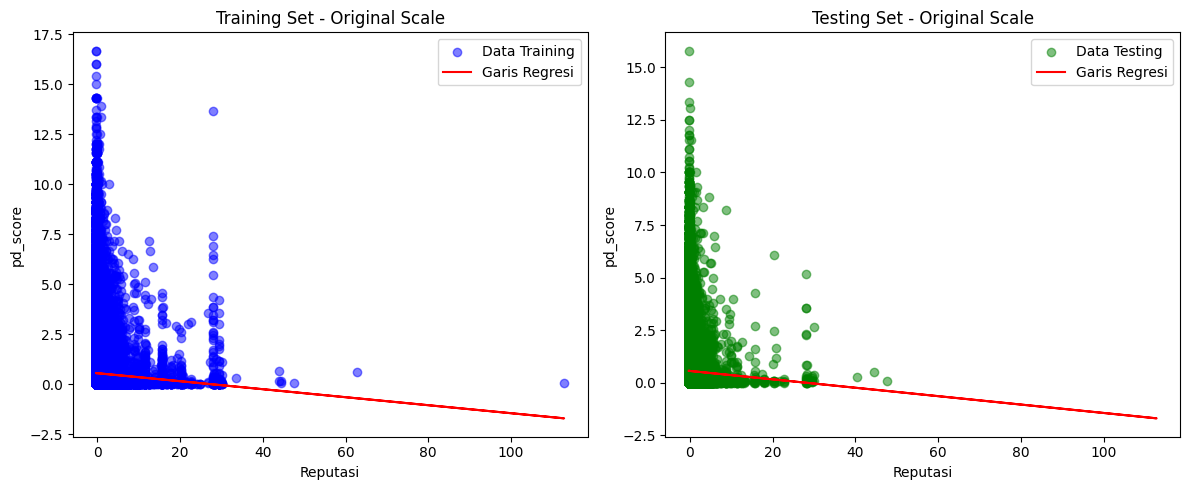

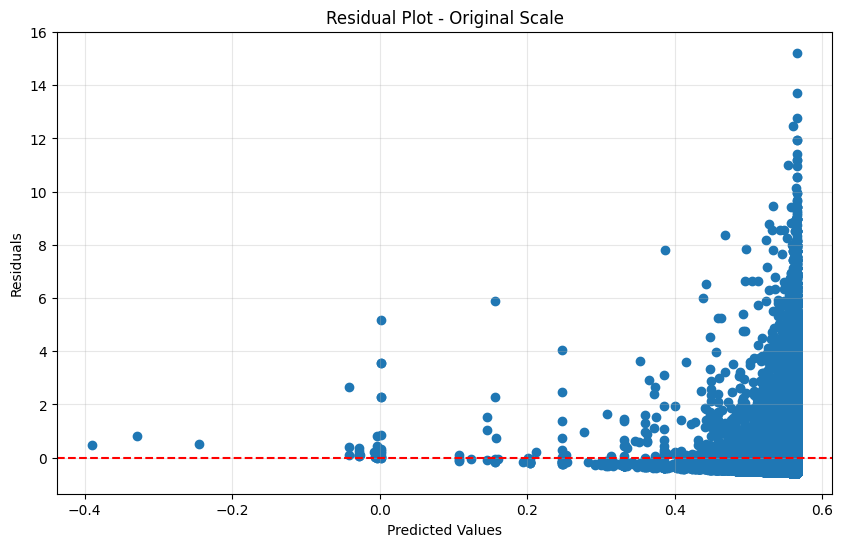

In [14]:
perform_regression(df[['Reputation_scaled']], df['pd_score'], 'Original Scale')


Hasil Analisis Regresi Linear untuk Log Transformed:
--------------------------------------------------
Slope/Koefisien: -0.09217956276041865
Intercept: 0.5610979148482348
P-value slope: 0.0
P-value intercept: 0.0
R-squared (training): 0.00726367576347442
R-squared (testing): 0.007087510032176003
RMSE (training): 1.0786599302889852
RMSE (testing): 1.07118985418805


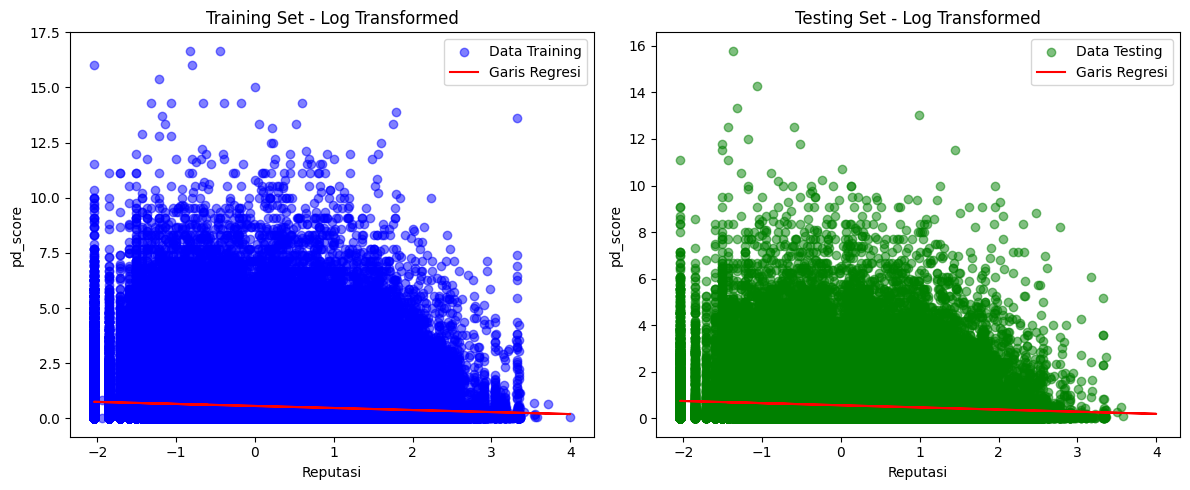

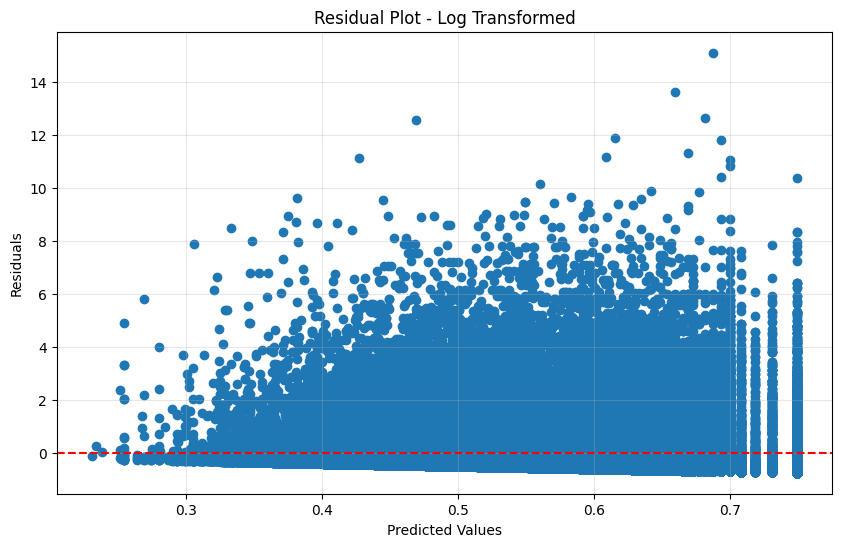

In [15]:
perform_regression(df[['Reputation_log_scaled']], df['pd_score'], 'Log Transformed')

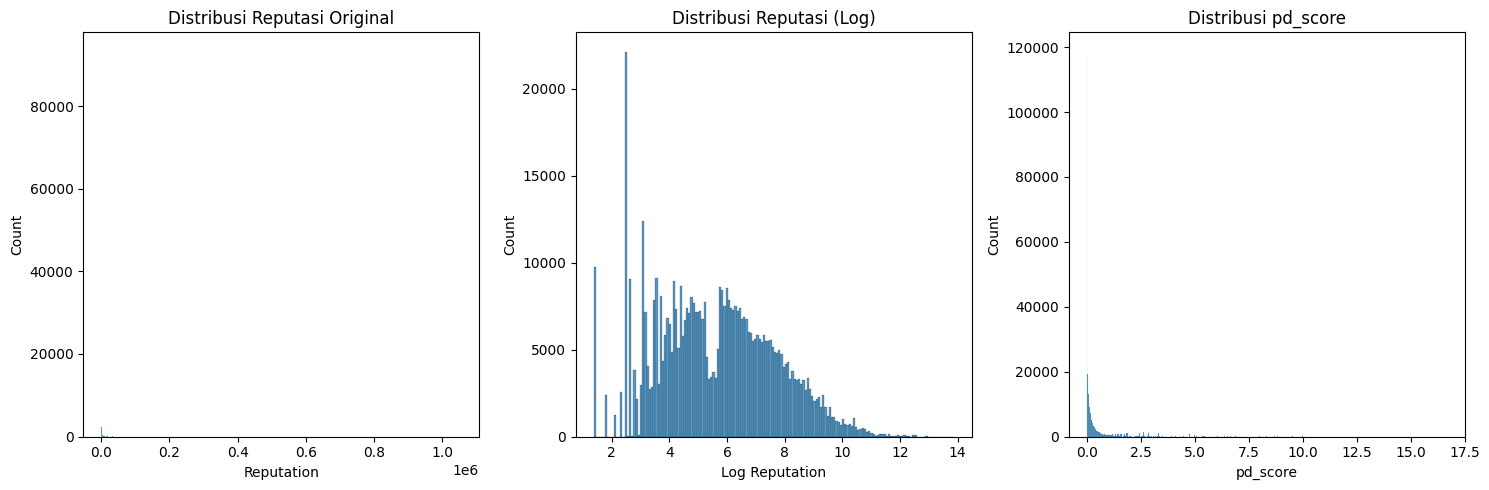

In [16]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Distribusi Reputasi Original')
sns.histplot(data=df, x='Reputation')
plt.xlabel('Reputation')

plt.subplot(1, 3, 2)
plt.title('Distribusi Reputasi (Log)')
sns.histplot(data=df, x='Reputation_log')
plt.xlabel('Log Reputation')

plt.subplot(1, 3, 3)
plt.title('Distribusi pd_score')
sns.histplot(data=df, x='pd_score')
plt.xlabel('pd_score')

plt.tight_layout()
plt.show()

In [17]:
print("\nHasil Analisis Regresi Linear (Log Transformation):")
print("-" * 50)
print(f"Slope/Koefisien (log): {slope_log}")
print(f"Intercept (log): {intercept_log}")
print(f"R-squared training (log): {r2_log_train}")
print(f"R-squared testing (log): {r2_log_test}")
print(f"RMSE training (log): {rmse_log_train}")
print(f"RMSE testing (log): {rmse_log_test}")


Hasil Analisis Regresi Linear (Log Transformation):
--------------------------------------------------
Slope/Koefisien (log): -0.09217956276041865
Intercept (log): 0.5610979148482348
R-squared training (log): 0.00726367576347442
R-squared testing (log): 0.007087510032176003
RMSE training (log): 1.0786599302889852
RMSE testing (log): 1.07118985418805


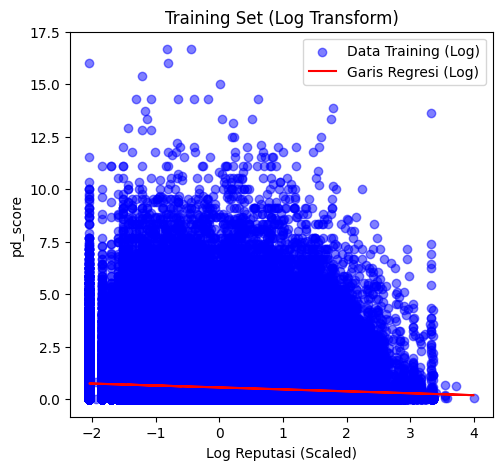

In [18]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_log_train, y_log_train, color='blue', label='Data Training (Log)', alpha=0.5)
plt.plot(X_log_train, y_pred_log_train, color='red', label='Garis Regresi (Log)')
plt.title('Training Set (Log Transform)')
plt.xlabel('Log Reputasi (Scaled)')
plt.ylabel('pd_score')
plt.legend()

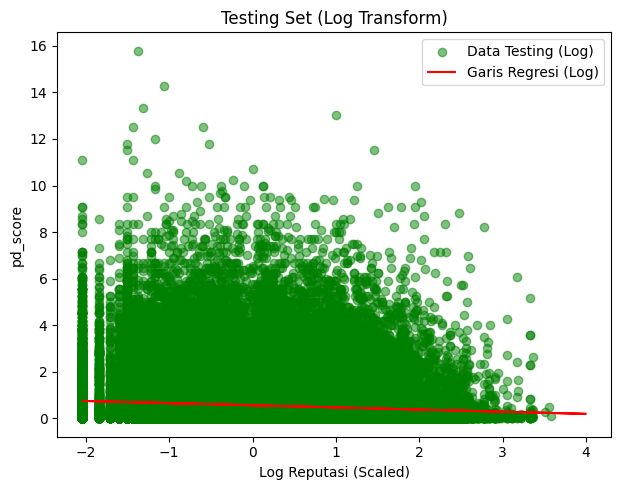

In [19]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.scatter(X_log_test, y_log_test, color='green', label='Data Testing (Log)', alpha=0.5)
plt.plot(X_log_train, y_pred_log_train, color='red', label='Garis Regresi (Log)')
plt.title('Testing Set (Log Transform)')
plt.xlabel('Log Reputasi (Scaled)')
plt.ylabel('pd_score')
plt.legend()

plt.tight_layout()
plt.show()

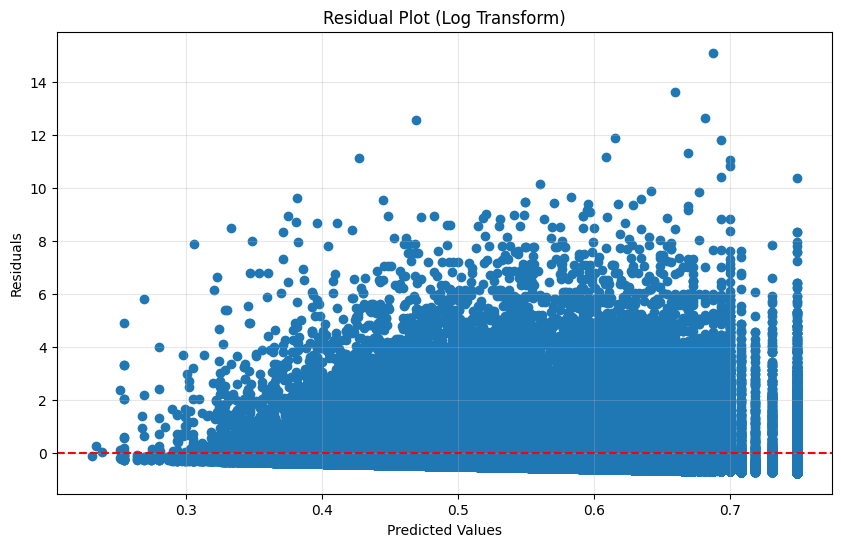

In [20]:
residuals_log = y_log_test - y_pred_log_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_log_test, residuals_log)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Log Transform)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True, alpha=0.3)
plt.show()